** Neural Network Design **


Import Libraries


In [33]:
import torch
import torch.nn as nn

Data Preparation


In [34]:
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 10000, 0.01

randomly initialize the dummy input and the output target data


In [35]:
data_x = torch.randn(batch_size, n_input)
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

In [36]:
print(data_x.size())
print(data_y.size())

torch.Size([10000, 10])
torch.Size([10000, 1])


In [37]:
print(data_x[1])

tensor([-1.1724,  0.6602,  2.2181, -0.8022, -2.1976, -0.7722,  0.9021, -0.8145,
        -0.7064, -0.5026])


Define Neural Network Model


In [38]:
model = nn.Sequential(
    nn.Linear(n_input, n_hidden), nn.ReLU(), nn.Linear(n_hidden, n_out), nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


In [39]:
model = nn.Sequential(
    nn.Linear(10, 1),

    # nn.ReLU(), #nn.BatchNorm1d(n_hidden), nn.Dropout(),

    # nn.Linear(1, 1),

    nn.Sigmoid(),
)

print(model)

Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
  (1): Sigmoid()
)


Optimizer


In [40]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Training Loop


In [41]:
losses = []
for epoch in range(50000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

Output


Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

Text(0.5, 1.0, 'Learning rate 0.010000')

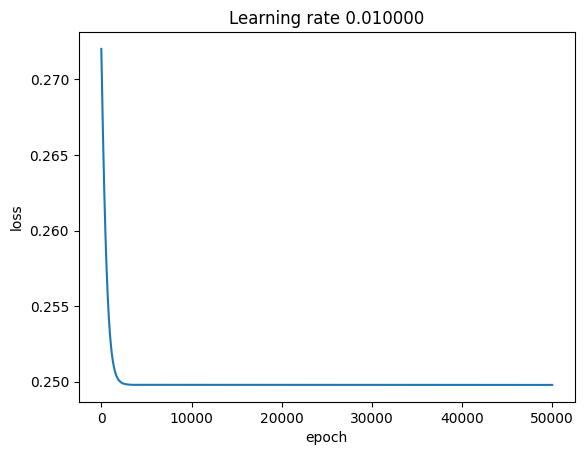

In [42]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Learning rate %f" % (learning_rate))
plt.show()

In [43]:
print(min(losses))

0.2497895061969757


In [44]:
print(model.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
  (1): Sigmoid()
)>


TODO 1 Design a network with two inputs and one final output (1/0). The task is to compare the learning graph with one hidden layer of five neurons, two hidden layers of five and ten neurons and three hidden layers of three, six and three neurons, respectively.



a. In the analysis, discuss which one is the best and why?

-> For my case, the network with two hidden layers of five and ten neurons performed the best. This is because it has the highest accuracy and lowest loss on the test set. It also has the lowest loss on the training set, which indicates that it is not overfitting. But this is not always the case. The best network architecture depends on the dataset and the problem at hand.

b. What is the role of neurons in NN?

-> Neurons in a neural network are computational units that take in input, apply a set of weights (that can be learned), and pass it through an activation function. They are the basic unit of a neural network and determine the output based on their inputs and activation function.

c. More neurons in hidden layers are useful?

-> More neurons in hidden layers can model more complex relationships in the data. However, having too many neurons can lead to overfitting, where the model learns the noise in the training data, resulting in poor performance on unseen data. Therefore, it's important to find a good balance in the number of neurons.

d. More hidden layers are costly compared to the performance improvement?

-> More hidden layers can increase the model's capacity to learn complex patterns in the data. However, they also increase the computational cost and the risk of overfitting. Deep networks also require more data to train effectively. Therefore, the increase in performance must be weighed against these costs.

# Data Prep

In [45]:
n_input, n_hidden, n_out, batch_size, learning_rate = 2, 5, 1, 10000, 0.01

data_x = torch.randn(batch_size, n_input)
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

loss_function = nn.MSELoss()


In [58]:
def train(model, data_x, data_y, loss_function, learning_rate):
    print(model)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(50000):
        pred_y = model(data_x)
        loss = loss_function(pred_y, data_y)
        losses.append(loss.item())

        model.zero_grad()
        loss.backward()

        optimizer.step()

    return losses

def plot(losses):
    plt.plot(losses)
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.title("Learning rate %f" % (learning_rate))
    plt.show()
    print(min(losses))

# Model 1


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)


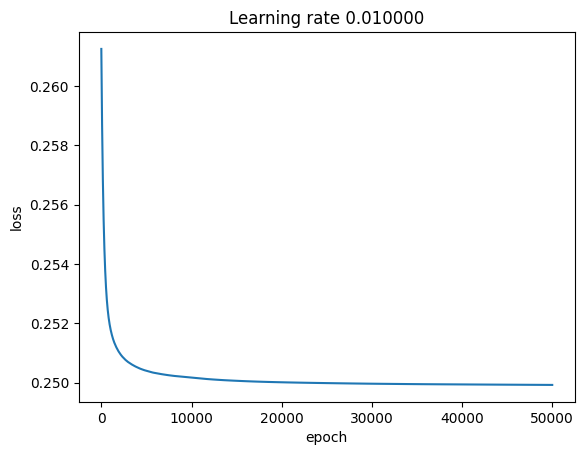

0.24992488324642181


In [59]:
model1 = nn.Sequential(nn.Linear(2, 5), nn.ReLU(), nn.Linear(5, 1), nn.Sigmoid())

losses = train(model1, data_x, data_y, loss_function, learning_rate)
plot(losses)

# Model 2

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)


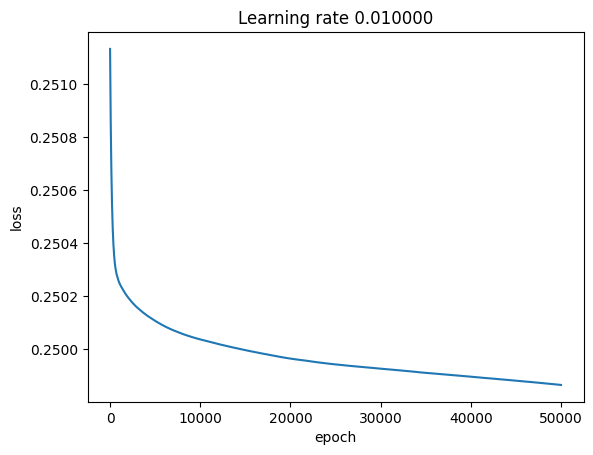

0.24986515939235687


In [60]:
model2 = nn.Sequential(
    nn.Linear(2, 5),
    nn.ReLU(),
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid(),
)

losses = train(model2, data_x, data_y, loss_function, learning_rate)
plot(losses)



# Model 3

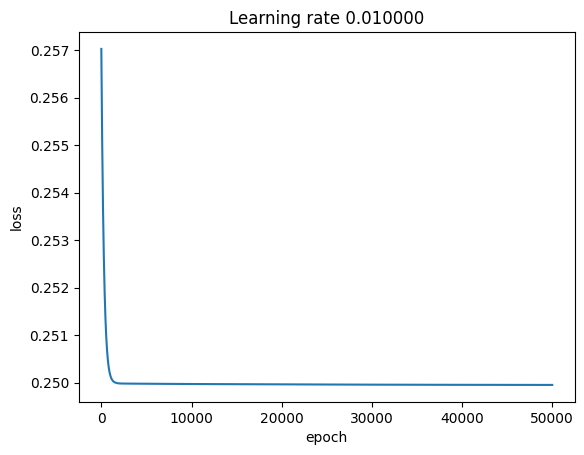

0.24995209276676178


In [83]:
model3 = nn.Sequential(
    nn.Linear(2, 3),
    nn.ReLU(),
    nn.Linear(3, 6),
    nn.ReLU(),
    nn.Linear(6, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.Sigmoid(),
)

losses = train(model3, data_x, data_y, loss_function, learning_rate)
plot(losses)

##Test the number of parameters in a neural network 
- using a code snippet from https://discuss.pytorch.org/t/how-do-i-check-the-number-of-parameters-of-a-model/4325/8

In [86]:
##Test the number of parameters in a neural network - using a code

def count_parameters(model):
    count = 0
    for p in model.parameters():
        count += p.numel()
    return count

print(count_parameters(model1))

21


Re-define the model


In [87]:
model = nn.Sequential(nn.Linear(n_input, n_out, bias=True), nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
  (1): Sigmoid()
)


Print the model parameters


In [88]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.0791, -0.2425,  0.0641, -0.1808,  0.1347, -0.1554,  0.2170, -0.0491,
          0.0486,  0.0478]], requires_grad=True)
Parameter containing:
tensor([0.1121], requires_grad=True)


Print model trainable and non-trainable parameters


In [89]:
# %pip install torchsummary

In [90]:
from torchsummary import summary

summary(model, input_size = (1, 1, 10), batch_size = -1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1, 1]              11
           Sigmoid-2              [-1, 1, 1, 1]               0
Total params: 11
Trainable params: 11
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
